# Assignment_Predictive Modelling using Python

In [4]:
# 1. Import House Price Data. Check the structure of the data.
import pandas as pd
hprice_data = pd.read_csv("House Price Data.csv")

In [5]:
hprice_data.head()

,Houseid,Price,Area,Distance,Schools
0,1,24.74,1036,3.22,2
1,2,20.15,1030,4.33,3
2,3,25.98,1046,1.94,3
3,4,20.10,950,2.45,2
4,5,23.03,952,2.47,2


In [6]:
hprice_data.shape

(198, 5)

In [7]:
hprice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Houseid   198 non-null    int64  
 1   Price     198 non-null    float64
 2   Area      198 non-null    int64  
 3   Distance  198 non-null    float64
 4   Schools   198 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 7.9 KB


In [11]:
hprice_data.describe()

,Price,Area,Distance,Schools
count,198.000000,198.000000,198.000000,198.000000
mean,25.390455,1040.393939,2.335152,2.494949
std,4.854549,98.348786,0.991971,0.540234
min,16.300000,825.000000,0.100000,1.000000
25%,21.532500,967.000000,1.930000,2.000000
50%,25.305000,1033.000000,2.260000,3.000000
75%,28.670000,1094.000000,3.040000,3.000000
max,35.490000,1345.000000,4.330000,3.000000


In [8]:
hprice_data.drop(columns=['Houseid'], inplace=True)

<Axes: >

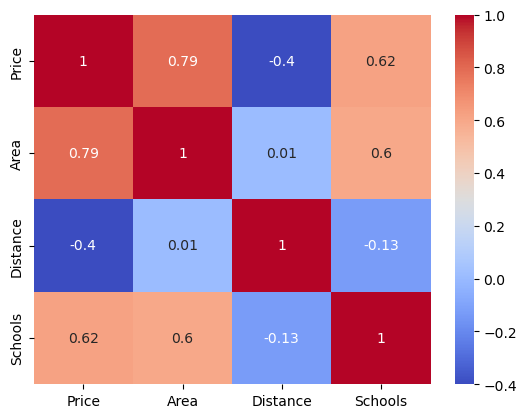

In [9]:
# Correlation matrix using heatmap
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = hprice_data.corr().round(2)
sns.heatmap(data=correlation_matrix, cmap='coolwarm', annot=True)

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


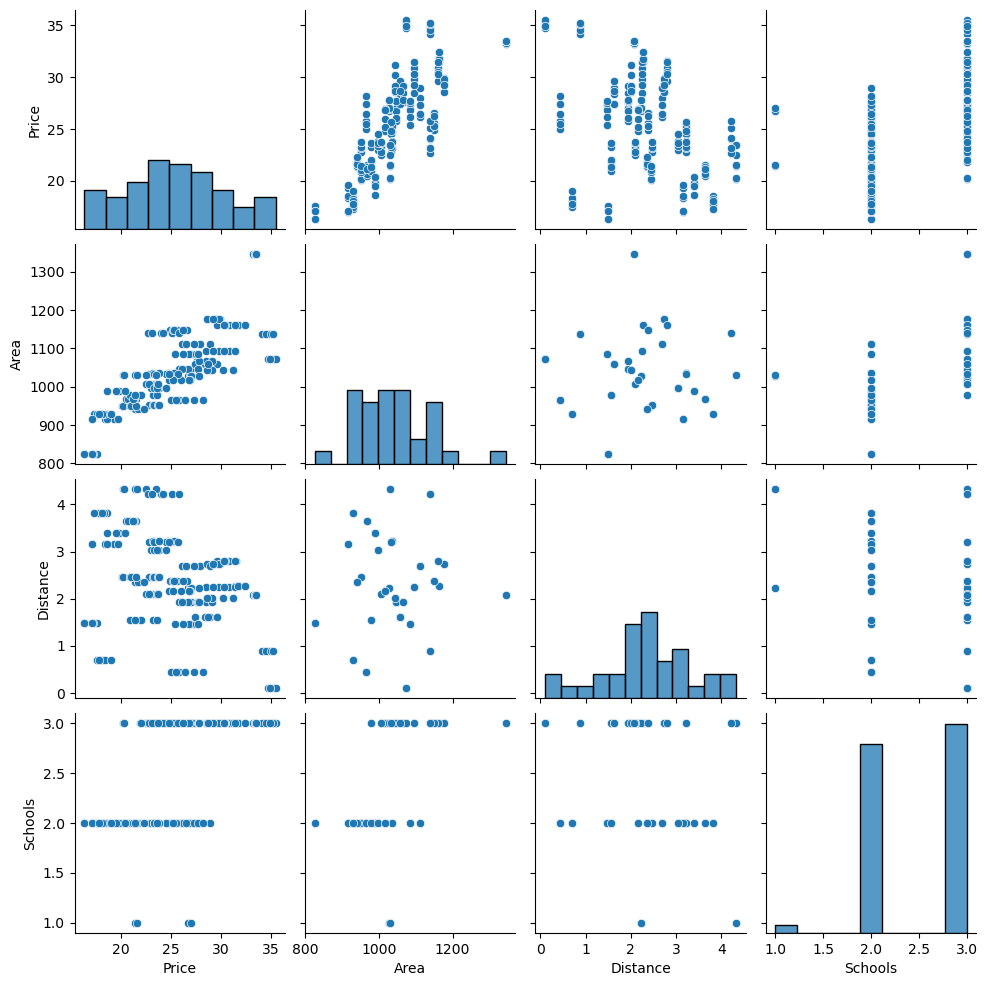

In [10]:
# Visualising data relationships using scatterplot matrix
sns.pairplot(hprice_data)
plt.show()

In [22]:
# 2. Split the data into Training (80%) and Testing (20%) data sets

# Import the train_test_split function from sklearn libraries
import numpy as np
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
x = hprice_data[['Area', 'Distance', 'Schools']] # Feature variable
y = hprice_data['Price'] # Target variable

# Split in Training set  and Testing set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (158, 3) (158,)
Testing set shape: (40, 3) (40,)


In [33]:
# 3. Build a regression model on training data to estimate selling price of a House.

# Run linear regression model using LinearRegression function from sklearn library
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

hprice_data1 = LinearRegression()

hprice_data1.fit(x_train, y_train) # Model fit for training data

LinearRegression()

hprice_data1.coef_

array([ 0.03432257, -1.87365406,  1.43789842])

In [27]:
# 4. List down significant variables and interpret their regression coefficients.

hprice_data1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     249.0
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           3.03e-66
Time:                        08:36:13   Log-Likelihood:                -436.96
No. Observations:                 198   AIC:                             881.9
Df Residuals:                     194   BIC:                             895.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.5423      1.744     -5.472      0.000     -12.982      -6.103
Area           0.0346      0.002     17.111      0.000       0.031       0.039
Distance      -1.8704      0.162    -11.564      0.000      -2.189      -1.551
Schools        1.3187      0.371      3.552      0.000       0.586       2.051
==============================================================================
Omnibus:                       12.632   Durbin-Watson:                   1.558
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.367
Skew:                          -0.629   Prob(JB):                      0.00125
Kurtosis:                       3.191   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Comment: The test output produced very high statistically significant values for all the three variables (Schools, Area, Distance) with p-values < 0.05, which implies that all the independent variables are very strong predictors for the selling prices of house.

In [35]:
coefficients = hprice_data1.coef_
feature_names = x_train.columns

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

significant_variables = coefficients_df.sort_values(by='Coefficient', ascending=False)

print(significant_variables)

    Feature  Coefficient
2   Schools     1.437898
0      Area     0.034323
1  Distance    -1.873654


In [59]:
# 4. List down significant variables and interpret their regression coefficients.

### Comments: The model summary outputs show that all the three predictor variables (Area, Distance and Schools) have p_values less than 0.05 (p<0.05) and are statistically significant at *** Confidence Interval. 
### The estimated regression coefficients of all the variables are: -9.542258 for the Selling Prices (intercept); +0.034612 for Area; -1.870419 for Distance and +1.318738 for Schools. It means that when all the predictors are at zero coefficient, the coefficient for the 'selling prices' = -Rs9.542258. And so when controlling for all the other variables in the model, each additional unit increase in the predictors means that 'selling prices' is expected to increase by Rs1.32 for the schools and Rs0.03 for the Area and decreases for the Distance by Rs1.87 (-Rs1.87) when holding other variables constant.

In [41]:
# 5. What is the R2 and adjusted R2 of the model? Give interpretation.
# Validation of the model by Holdout Method 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import numpy as np

y_train_predict = hprice_data1.predict(x_train)

rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

r2 = r2_score(y_train, y_train_predict)
print('R2 score is {}'.format(r2))

R2 score is 0.8078982921162


Training R2: 0.8078982921162


In [42]:
print('Training Adjusted R2:', train_adj_r2)

Training Adjusted R2: 0.8041560510535286


In [43]:
print('Testing R2:', test_r2)

Testing R2: 0.7119282502406241


In [44]:
print('Testing Adjusted R2:', test_adj_r2)

Testing Adjusted R2: 0.6879222710940094


In [45]:
# 6. Is there a multicollinearity problem? If yes, do the necessary steps to remove it.

# Checking for multicollinearity in the training model
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y,x = dmatrices('Price~Area+Distance+Schools', data=hprice_data, return_type='dataframe')

vif = pd.Series([variance_inflation_factor(x.values, i)for i in range(x.shape[1])],
                index=x.columns)
print(vif)

Intercept    122.035682
Area           1.580103
Distance       1.027805
Schools        1.606248
dtype: float64


### Comments: There is no multicollinearity present in the model given that non of the variables has VIF greater than 5.  They are all <  5.

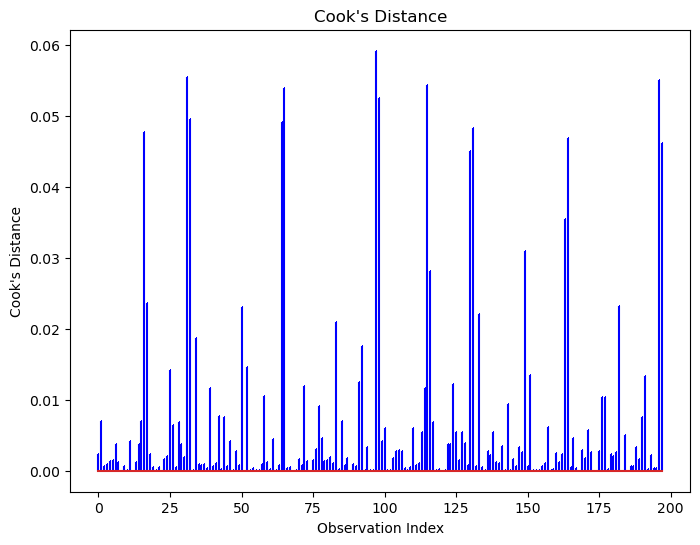

In [46]:
# 7.Are there any influential observations in the data?
# Check for influential observations in the model data
import statsmodels.api as sm
import matplotlib.pyplot as plt

x = sm.add_constant(x)
hprice_data1 = sm.OLS(y, x).fit()

influence = hprice_data1.get_influence()
cook_distance = influence.cooks_distance

plt.figure(figsize=(8, 6))
plt.stem(cook_distance[0], markerfmt=",", linefmt="b-")
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()

In [71]:
influence.summary_frame()

,dfb_Intercept,dfb_Area,dfb_Distance,dfb_Schools,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.012524,0.032513,0.042302,-0.057540,0.002382,0.820287,0.013962,0.097611,0.819593,0.097528
1,-0.002247,0.064382,-0.136021,-0.096864,0.006984,-0.833577,0.038652,-0.167143,-0.832918,-0.167011
2,-0.009650,0.019752,0.007083,-0.035154,0.000621,-0.457200,0.011741,-0.049833,-0.456266,-0.049731
3,-0.036633,0.019434,-0.001978,0.018502,0.000902,-0.585677,0.010405,-0.060054,-0.584683,-0.059952
4,0.044085,-0.022878,0.003375,-0.023569,0.001371,0.725823,0.010299,0.074041,0.724934,0.073950
...,...,...,...,...,...,...,...,...,...,...
193,-0.037255,0.059471,0.000519,-0.074122,0.002192,-0.732755,0.016068,-0.093639,-0.731878,-0.093527
194,0.005531,0.012382,-0.009907,-0.029531,0.000452,0.409312,0.010665,0.042498,0.408432,0.042407
195,0.004033,-0.017599,0.021347,0.026987,0.000352,0.270763,0.018826,0.037506,0.270115,0.037416
196,-0.295521,0.113213,0.355480,0.118927,0.054992,-2.820564,0.026906,-0.469008,-2.872806,-0.477695


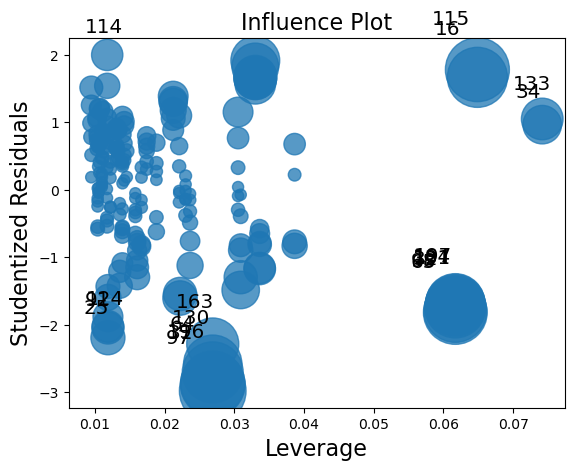

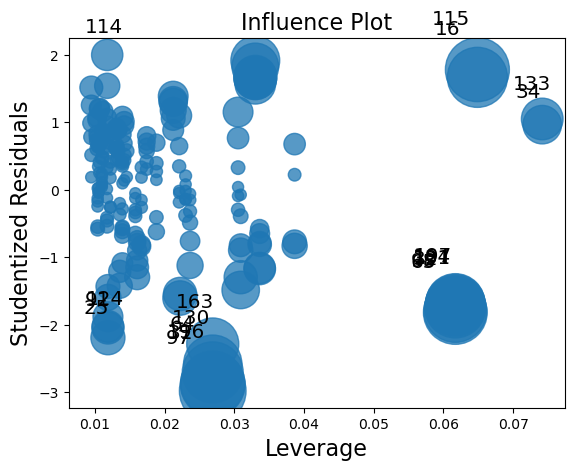

In [47]:
# Influence Plot for Studentised Residuals in 'Bubble' plot
from statsmodels.graphics.regressionplots import *
influence_plot(hprice_data1, criterion = 'Cooks')

### Comment: Bubble Plot shows some influential observations in Cook's Distances.Data points detected in the bubbles include, inter alia, 114, 115, 133, 16, 34, 163.

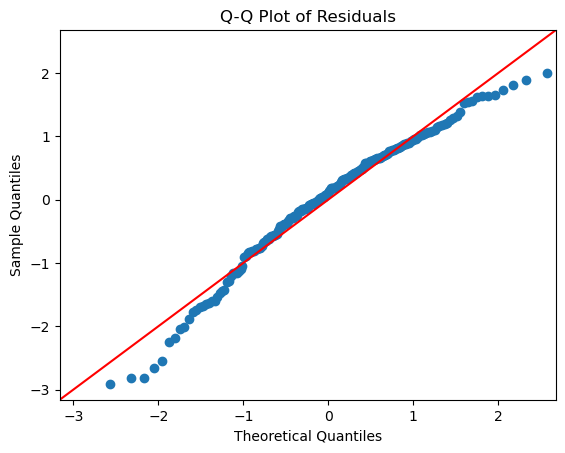

In [68]:
# 8. Can we assume that errors follow ‘Normal’ distribution?

# Check for normal distribution of errors using Q-Q Plot & Shapiro Test
import statsmodels.api as sm
import matplotlib.pyplot as plt

residuals = hprice_data1.resid

fig = sm.graphics.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

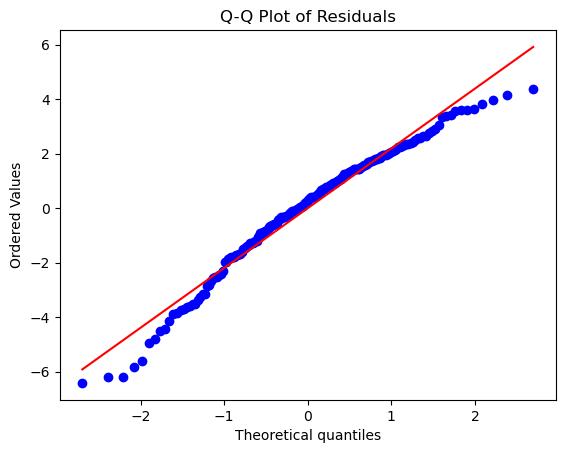

In [76]:
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

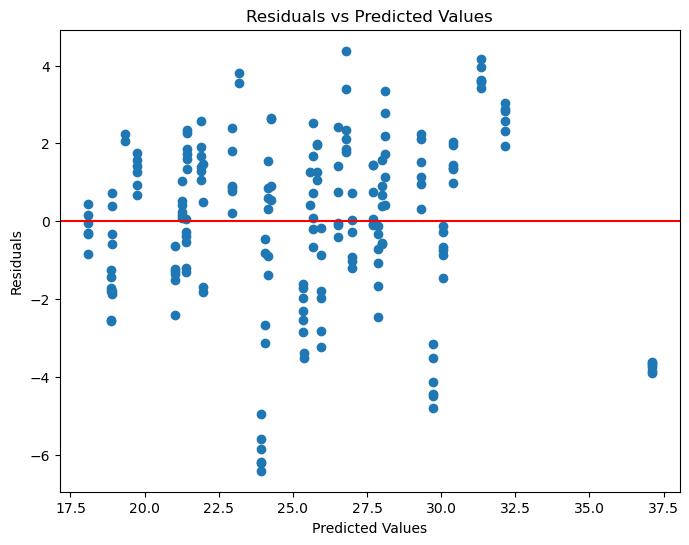

In [69]:
# 9. Is there a Heteroscedasticity problem? Check using residual vs. predictor plots.

# Plot residuals vs predicted values
residuals = hprice_data1.resid
predicted_values = hprice_data1.fittedvalues

plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.axhline(y=0, color='r', linestyle='-')  # Add horizontal line at y=0
plt.show()

In [ ]:
# 10. Calculate the RMSE for the Training and Testing data.
# Finding the RSME of the Training Data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

y_train_predict = hprice_data1.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

In [82]:
print('Traindata RMSE is {}'.format(rmse))

Traindata RMSE is 2.191854721962791


In [ ]:
# Obtain the RSME values for the Testing Data 
y_test_predict = hprice_data1.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

In [73]:
print('Testdata RMSE is {}'.format(rmse))

Testdata RMSE is 2.191854721962791
